In [1]:
from photutils.datasets import make_100gaussians_image
data = make_100gaussians_image()

In [5]:
data

array([[4.59058468, 5.95788668, 3.96112257, ..., 6.15103616, 7.98475   ,
        7.53122691],
       [3.47632557, 4.3367662 , 1.49736914, ..., 2.75966316, 6.28053528,
        7.76908866],
       [3.03299057, 6.86188753, 3.37664872, ..., 8.66110464, 5.72836898,
        8.3720348 ],
       ...,
       [2.45668254, 6.59585116, 2.20145215, ..., 3.90590851, 3.15044312,
        3.77336563],
       [5.22720412, 2.79002809, 5.80162558, ..., 5.42088716, 4.45218764,
        3.10022021],
       [4.60782967, 4.55835813, 3.15777289, ..., 3.76400917, 5.97520517,
        3.81692699]])

Fontconfig warning: ignoring UTF-8: not a valid region tag


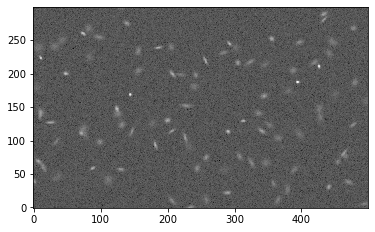

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, norm=norm, origin='lower', cmap='Greys_r',
           interpolation='nearest')

In [3]:
import numpy as np
from astropy.stats import biweight_location
print(np.median(data))  

print(biweight_location(data))  

5.225529518399048
5.186759755495727


In [4]:
from astropy.stats import mad_std
print(mad_std(data))  

2.1443760096598914


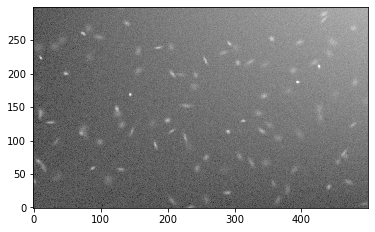

In [6]:
ny, nx = data.shape
y, x = np.mgrid[:ny, :nx]
gradient = x * y / 5000.
data2 = data + gradient
plt.imshow(data2, norm=norm, origin='lower', cmap='Greys_r',
           interpolation='nearest')  

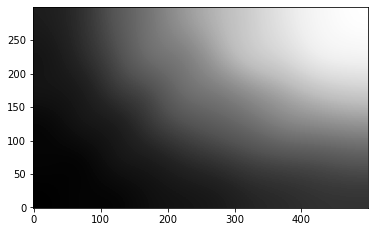

In [7]:
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(data2, (50, 50), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

plt.imshow(bkg.background, origin='lower', cmap='Greys_r',
           interpolation='nearest')

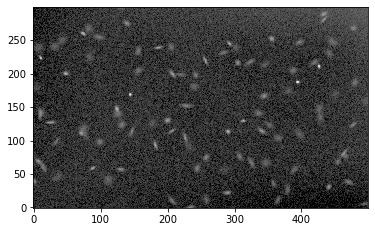

In [8]:
plt.imshow(data2 - bkg.background, norm=norm, origin='lower',
           cmap='Greys_r', interpolation='nearest')

In [11]:
import os
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.io.fits import getdata
from astropy.wcs import WCS
# import cv2
import glob
import torch

%pylab
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.colors as colors
from matplotlib import rcParams
rcParams["font.size"] = 14

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/home/jdli/anaconda3/envs/phot/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
